# GPT

https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf  

다양한 task에서 NLP발전이 이루어졌는데  unlabeled corpora에 비해 labeled data는 매우 적음  
unlabeled data로 language model을 pre-training하고 각 task에 맞게 fine-tuning을 하는 방법을 제안


## Related works

### Semi-supervised learning for NLP
지난 연구에서는 unlabeled corpora에서 train된 word embedding이 다양한 task에서 성능을 향상 시킴. 그러나 이런 방식은 주로 word-level 정보를 전달, 우리는 더 높은 레벨을 목표로 함

### Unsupervised pre-training
semi-supervised learning의 케이스로 좋은 initialization을 하는 것이 목적  
pre-training은 regularization scheme으로서 더 좋은 일반화 성능을 갖게 하여 여러 task에서 사용 됨

비슷한 연구가 있었으나 LSTM을 사용하여 짧은 문장으로 성능이 제한됨

### Auxiliary training objective
각 task에 맞게 보조 objective를 추가하는 방식들을 말해줌

## Summary

unlabeled text로 부터 word-level 이상의 정보를 활용하는 것은 다음의 두가지 이유 때문에 challenge
1. transfer에 유용한 text representation을 학습하기 위해 어떤 optimization objective가 효율적인지 불분명함 ( 최근에는 LM, MT 등의 objective가 다른 task에 비해 좋은 성능을 냄 )
2. target task에 학습된 representation을 전달하는 가장 효율적인 방법이 일치 되지 않음
(예를 들어 task에 맞게 모델 구조를 변화, 복잡한 학습 계획, 보조 목표 추가 등) 이러한 불확실성은 semi-supervised 접근 방법을 어렵게 만듬  

unsupervised pre-training과 supervised fine-tuning을 조합한 semi-supervised 접근법을 제시, 작은 adaption 만으로 다양한 task에 적용할 수 있는 범용적인 representation을 학습하는 것이 목표, framework는 2 stage로 나눔  

모델 구조로는 Transformer를 사용 (RNN에 비해 long-term dependency 해결, 다양한 task에서 robust한 transfer 효과)
transfer할 때, task-specific input adaption(traversal style approach) 을 활용했고 이러한 방식이 pre-trained model 을 적게 변화시키며 효과적으로 fine-tuning 할 수 있는 것을 보임  

**stage 1** : unlabeled data를 이용하여 Language model objective로 pre-training  
아래의 likelihood를 최대화 하여 기본적인 언어모델링 수행
$$ L_1(𝒰) = Σ_i log P(u_i|u_{i-k},...,u_{i-1};ϴ) $$
model은 multi-layers transformer decoder를 이용(SGD로 training)

**stage 2** : target task에 맞는 labeled data를 이용하여 target objective로 추가 학습(fine-tuning)
학습된 모델에 추가로 linear layer를 추가하여 학습
$$ P(y|x^1,...,x^m) = softmax(h_l^mW_y) $$
$$ L_2(𝑪) = Σ_{(x,y)} log P(y|x^1,...,x^m)$$
추가로 보조 objective로서 언어모델링을 포함하는 것은 지도학습 모델의 일반화 성능을 향상, 수렴 속도 가속화 하는 것을 알아내어 최종적으로 아래의 식을 최대화
$$ L_3(𝑪) = L_2(𝑪) + \lambda L_1(𝑪)$$

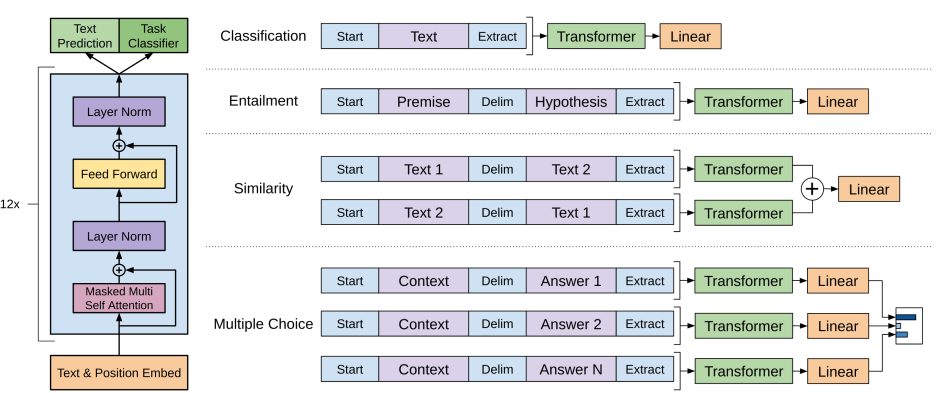


Task에 맞게 input을 ordered sequence로 하여 pre-train 된 모델이 광범위하게 변하는 것을 피할 수 있음 ( pre-training 시 이미 sequence of text로 학습됨 )

이렇게 학습된 모델은 여러 task에서 sota를 찍음

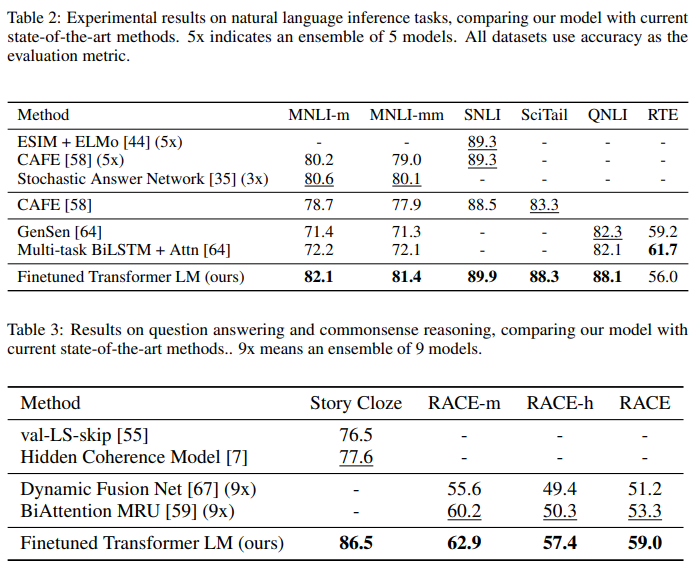

# 코드 실습

In [ ]:
# torchdata
!pip uninstall torch

!nvcc --version
# For CUDA 11.1
!pip install --pre torch -f https://download.pytorch.org/whl/nightly/cu111/torch_nightly.html
# Go to Runtime > Restart runtime
!pip install --user "git+https://github.com/pytorch/data.git"

In [1]:
!pip install torchdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 5.8 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
import torch
import torch.nn as nn

from torchtext.datasets import MNLI

In [3]:
data = MNLI(split='train')
data

ShardingFilterIterDataPipe

In [4]:
d = next(iter(data))

In [5]:
d

(1,
 'Conceptually cream skimming has two basic dimensions - product and geography.',
 'Product and geography are what make cream skimming work. ')